## Ngày 3: Khám phá dữ liệu (Exploratory Data Analysis - EDA)
Phân tích, trực quan hóa phân phối rating, phân tích người dùng và sản phẩm

### Mục tiêu:
- Hiểu dữ liệu
- Phân tích thống kê: Tính toán thông số cơ bản
- Trực quan hóa

In [12]:
# Load MovieLens dataset
import pandas as pd
import numpy as np

# Load the movies dataset
movies = pd.read_csv('../Datasets/MovieLens/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [13]:
ratings = pd.read_csv('../Datasets/MovieLens/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [14]:
# Phân tích thống kê cơ bản
ratings.describe()

,userId,movieId,rating,timestamp
count,3.200020e+07,3.200020e+07,3.200020e+07,3.200020e+07
mean,1.002785e+05,2.931861e+04,3.540396e+00,1.275241e+09
std,5.794905e+04,5.095816e+04,1.058986e+00,2.561630e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,5.005300e+04,1.233000e+03,3.000000e+00,1.051012e+09
50%,1.002970e+05,3.452000e+03,3.500000e+00,1.272622e+09
75%,1.504510e+05,4.419900e+04,4.000000e+00,1.503158e+09
max,2.009480e+05,2.927570e+05,5.000000e+00,1.697164e+09


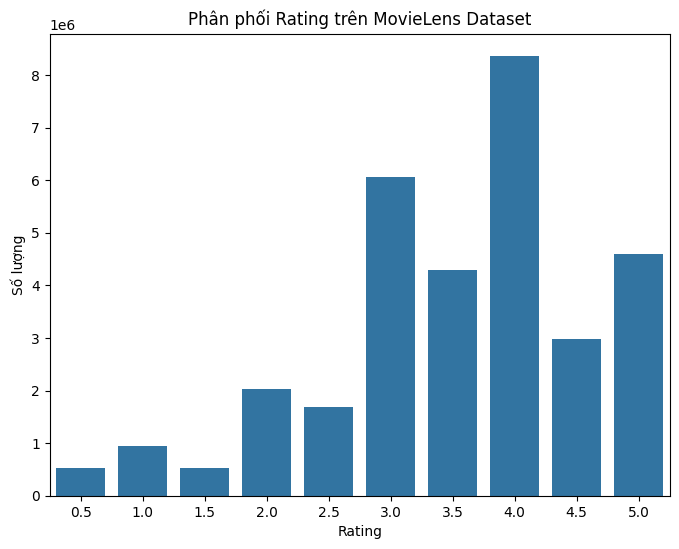

In [15]:
# Trực quan hóa dữ liệu
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.countplot(x='rating', data=ratings)
plt.title("Phân phối Rating trên MovieLens Dataset")
plt.xlabel("Rating")
plt.ylabel('Số lượng')
plt.show()
# Thể hiện số lượng rating ở mỗi mức, giúp nhận ra những đánh giá phổ biến nhất

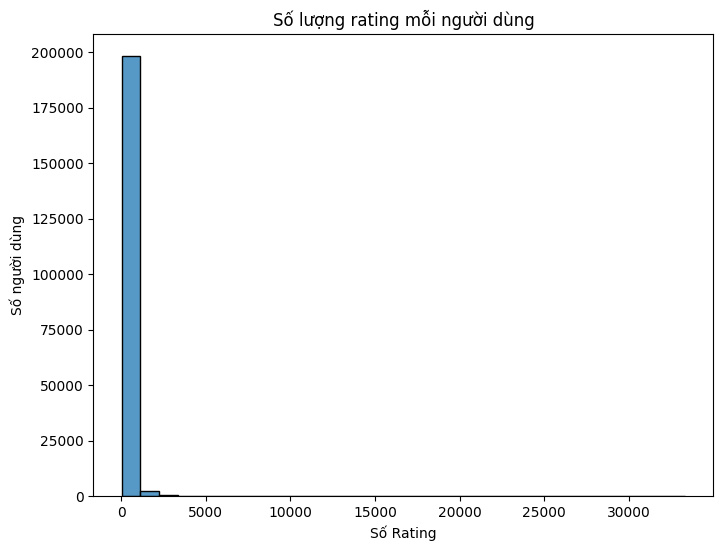

In [16]:
# Phân tích người dùng: Tìm hiểu rating trung bình mỗi người dùng đưa ra
user_counts = ratings.groupby('userId').size().reset_index(name='counts')
plt.figure(figsize=(8,6))
sns.histplot(user_counts['counts'], bins=30, kde=False)
plt.title("Số lượng rating mỗi người dùng")
plt.xlabel("Số Rating")
plt.ylabel("Số người dùng")
plt.show()

In [17]:
user_counts.describe()

,userId,counts
count,200948.000000,200948.000000
mean,100474.500000,159.246193
std,58008.835284,282.025462
min,1.000000,20.000000
25%,50237.750000,36.000000
50%,100474.500000,73.000000
75%,150711.250000,167.000000
max,200948.000000,33332.000000


In [18]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [19]:
# Lọc ra các bộ phim mà người dùng có Id = 1 đánh đánh giá 5 sao trên các phim đã xem
user_1_ratings = ratings[(ratings['userId'] == 1) & (ratings['rating'] == 5)]
user_1_ratings = user_1_ratings.merge(movies, on='movieId', how='inner')
user_1_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
2,1,80,5.0,944248943,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama
3,1,111,5.0,944249008,Taxi Driver (1976),Crime|Drama|Thriller
4,1,166,5.0,943228442,"Doom Generation, The (1995)",Comedy|Crime|Drama


In [20]:
# Lọc ra bộ phim có nhiều đánh giá 5 sao nhất
top_movies = ratings[ratings['rating'] == 5]
top_movies = top_movies.merge(movies, on='movieId', how='inner')
top_movies.head()

,userId,movieId,rating,timestamp,title,genres
0,1,30,5.0,944249077,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,Crime|Drama
1,1,32,5.0,943228858,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
2,1,80,5.0,944248943,"White Balloon, The (Badkonake sefid) (1995)",Children|Drama
3,1,111,5.0,944249008,Taxi Driver (1976),Crime|Drama|Thriller
4,1,166,5.0,943228442,"Doom Generation, The (1995)",Comedy|Crime|Drama
